# **DBSCAN** (*Yoğunluğa Dayalı Uzamsal Kümeleme Uygulamaları İçin Gürültülü Algoritma*)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

## İç içe çember

In [2]:
X_circles, y_circles = make_circles(n_samples=500, factor=0.5, noise=0.08, random_state=42)

X_noise = np.random.rand(50, 2) * 2 - 1
X_combined = np.concatenate([X_circles, X_noise])

In [12]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
clusters = dbscan.fit_predict(X_combined)

/tmp/ipython-input-70556644.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


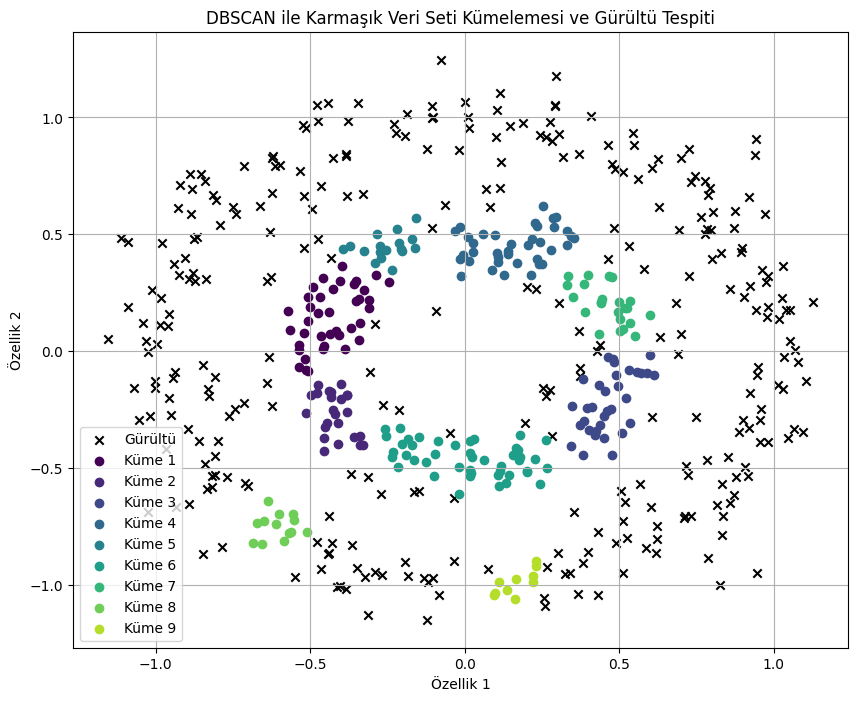

In [13]:
plt.figure(figsize=(10, 8))

unique_clusters = np.unique(clusters)
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

for cluster_label in unique_clusters:
    if cluster_label == -1:
        plt.scatter(X_combined[clusters == cluster_label, 0],
                    X_combined[clusters == cluster_label, 1],
                    c='black', marker='x', label='Gürültü')
    else:
        plt.scatter(X_combined[clusters == cluster_label, 0],
                    X_combined[clusters == cluster_label, 1],
                    color=colors(cluster_label), label=f'Küme {cluster_label + 1}')

plt.title('DBSCAN ile Karmaşık Veri Seti Kümelemesi ve Gürültü Tespiti')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend()
plt.grid(True)
plt.show()

## freud

In [15]:
X_normal, _ = make_blobs(n_samples=200, centers=[[0, 0], [5, 5]], cluster_std=0.5, random_state=42)
X_fraud = np.random.uniform(low=-2, high=7, size=(20, 2))

X_combined = np.vstack((X_normal, X_fraud))

In [16]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
clusters = dbscan.fit_predict(X_combined)

unique_clusters = np.unique(clusters)

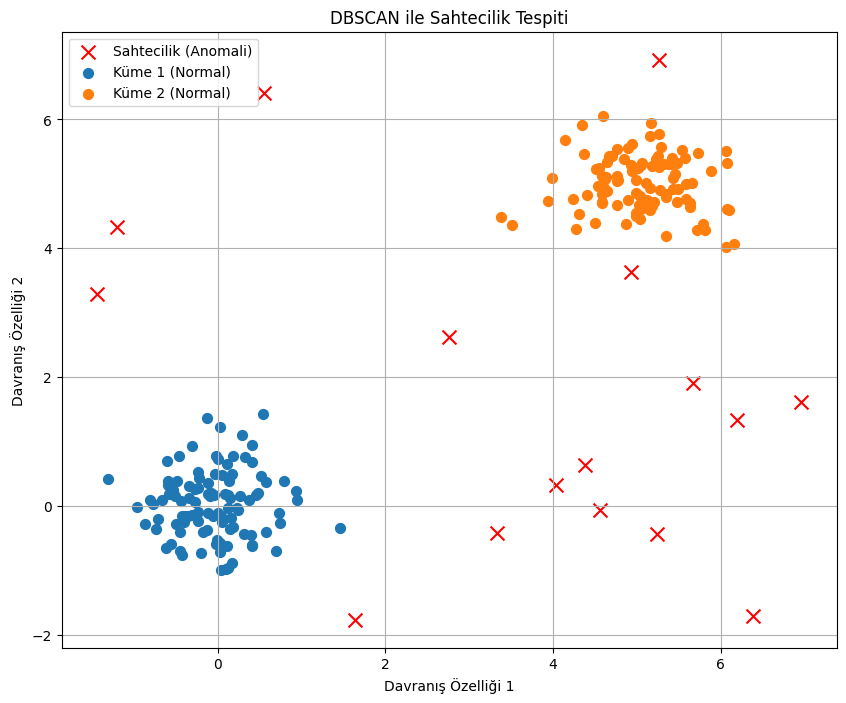

In [17]:
plt.figure(figsize=(10, 8))

for cluster_label in unique_clusters:
    if cluster_label == -1:
        plt.scatter(X_combined[clusters == cluster_label, 0],
                    X_combined[clusters == cluster_label, 1],
                    c='red', marker='x', s=100, label='Sahtecilik (Anomali)')
    else:
        plt.scatter(X_combined[clusters == cluster_label, 0],
                    X_combined[clusters == cluster_label, 1],
                    label=f'Küme {cluster_label+1} (Normal)', s=50)

plt.title('DBSCAN ile Sahtecilik Tespiti')
plt.xlabel('Davranış Özelliği 1')
plt.ylabel('Davranış Özelliği 2')
plt.legend()
plt.grid(True)
plt.show()